In [6]:
# importing the necessary libraries
import pandas as pd           # for data manipulation and analysis
import numpy as np            # for numerical computations
import seaborn as sns         # for data visualization
import sklearn as sk          # general scikit-learn import (not typically necessary)

# importing specific modules from sklearn
from sklearn import linear_model   # for linear regression, logistic regression, etc.
from sklearn import tree           # for decision tree models
from sklearn import ensemble       # for ensemble methods like RandomForest, GradientBoosting
from sklearn import svm            # for support vector machines

import xgboost                     # for eXtreme Gradient Boosting


In [7]:
data = pd.read_csv(r"/content/traffic volume.csv")


In [8]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [9]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [11]:
data.isnull().sum()

,0
holiday,48143
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [12]:
from collections import Counter # Add this line

data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

print(Counter(data['weather']))

# The output shown would typically follow:
# Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Fog': 912, 'nan': 49, 'Smoke': 20, 'Squall': 4})

data['weather'].fillna('Clouds',inplace=True)


Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


/tmp/ipython-input-12-2131860540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
/tmp/ipython-input-12-2131860540.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [23]:
data_numeric = data.select_dtypes(include=[np.number])
correlation_matrix = data_numeric.corr()
correlation_matrix



,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


<Axes: >

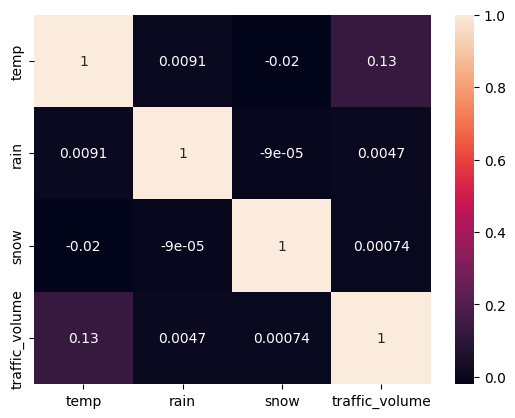

In [26]:
sns.heatmap(correlation_matrix, annot=True)

<Axes: >

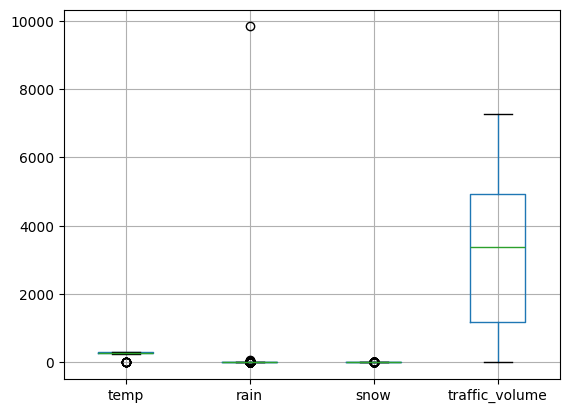

In [13]:
data.boxplot()

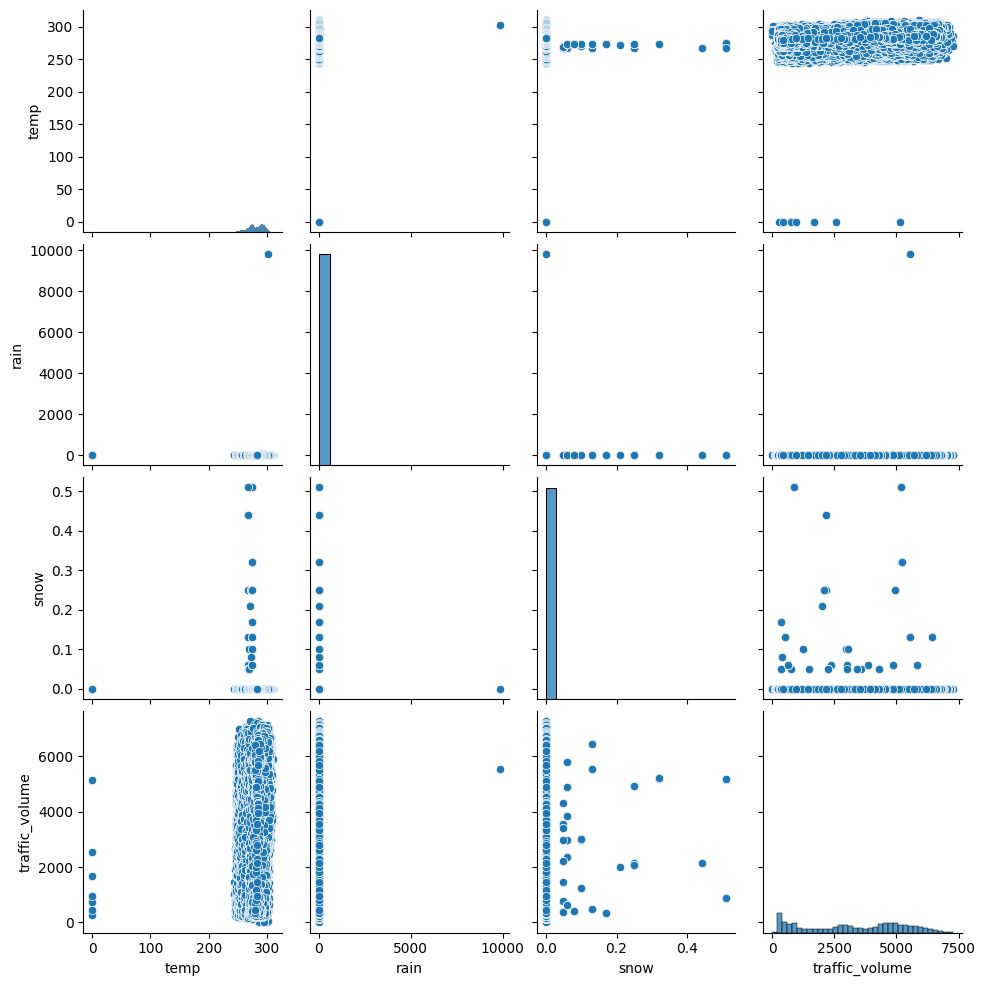

In [27]:
sns.pairplot(data)

In [14]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand = True)

In [15]:
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [16]:
data.drop(columns=['date', 'Time'], axis=1,inplace=True)

In [17]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [19]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'], axis=1)

In [29]:
from sklearn.preprocessing import scale

# Encode categorical columns (like 'holiday') using one-hot encoding
x = pd.get_dummies(x, drop_first=True)

# Save column names
names = x.columns

# Scale features
x = scale(x)

# Convert back to DataFrame
x = pd.DataFrame(x, columns=names)

# View top rows
x.head()


,temp,rain,snow,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_State Fair,...,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23
0,0.530485,-0.007463,-0.027235,-0.010185,-0.010185,-0.012051,-0.011157,-0.010185,-0.011157,-0.010185,...,-0.206366,-0.204446,-0.207402,-0.204391,-0.207293,-0.205928,-0.206911,-0.207075,-0.207728,-0.210215
1,0.611467,-0.007463,-0.027235,-0.010185,-0.010185,-0.012051,-0.011157,-0.010185,-0.011157,-0.010185,...,-0.206366,-0.204446,-0.207402,-0.204391,-0.207293,-0.205928,-0.206911,-0.207075,-0.207728,-0.210215
2,0.627964,-0.007463,-0.027235,-0.010185,-0.010185,-0.012051,-0.011157,-0.010185,-0.011157,-0.010185,...,-0.206366,-0.204446,-0.207402,-0.204391,-0.207293,-0.205928,-0.206911,-0.207075,-0.207728,-0.210215
3,0.669205,-0.007463,-0.027235,-0.010185,-0.010185,-0.012051,-0.011157,-0.010185,-0.011157,-0.010185,...,-0.206366,-0.204446,-0.207402,-0.204391,-0.207293,-0.205928,-0.206911,-0.207075,-0.207728,-0.210215
4,0.744939,-0.007463,-0.027235,-0.010185,-0.010185,-0.012051,-0.011157,-0.010185,-0.011157,-0.010185,...,-0.206366,-0.204446,-0.207402,-0.204391,-0.207293,-0.205928,-0.206911,-0.207075,-0.207728,-0.210215


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [31]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [33]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [35]:
from sklearn import metrics
# Assuming lin_reg, Dtree, Rand, svr, XGB are already trained
# and x_train, y_train, x_test, y_test are defined.

# --- Predictions on the Training Set (as per previous context) ---
p1_train = lin_reg.predict(x_train)
p2_train = Dtree.predict(x_train)
p3_train = Rand.predict(x_train)
p4_train = svr.predict(x_train)
p5_train = XGB.predict(x_train)

print("R2 scores on Training Set:")
print(metrics.r2_score(p1_train, y_train))
print(metrics.r2_score(p2_train, y_train))
print(metrics.r2_score(p3_train, y_train))
print(metrics.r2_score(p4_train, y_train))
print(metrics.r2_score(p5_train, y_train))

# --- Predictions on the Test Set ---
# You need to calculate predictions for the test set using x_test
p1_test = lin_reg.predict(x_test) # Corrected: p1 for test data
p2_test = Dtree.predict(x_test)
p3_test = Rand.predict(x_test)
p4_test = svr.predict(x_test)
p5_test = XGB.predict(x_test)

print("\nR2 scores on Test Set:")
print(metrics.r2_score(p1_test, y_test))
print(metrics.r2_score(p2_test, y_test))
print(metrics.r2_score(p3_test, y_test))
print(metrics.r2_score(p4_test, y_test))
print(metrics.r2_score(p5_test, y_test))

R2 scores on Training Set:
0.7180334886333546
1.0
0.9687456442212015
-110.267968701714
0.7431479096412659

R2 scores on Test Set:
0.7253816254700689
0.6676879089072176
0.7603567926350155
-109.70984497219168
0.6931703090667725


In [36]:
import numpy as np
from sklearn import metrics

# Assuming p3 and y_test are already defined from previous steps
# p3 would be the predictions from the RandomForestRegressor on the test set (Rand.predict(x_test))
# y_test would be the true target values for the test set

# RMSE values
MSE = metrics.mean_squared_error(p3, y_test)

print(np.sqrt(MSE))

886.9288543295274


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the encoder
le = LabelEncoder()
le.fit(y)  # 'y' is your target or categorical data
import pickle
pickle.dump(Rand, open("model.pkl", 'wb'))
pickle.dump(le, open("encoder.pkl", 'wb'))


NameError: name 'le' is not defined

In [45]:
import numpy as np
import pickle
import joblib
import matplotlib
import matplotlib.pyplot as plt
import time
import pandas
import os
from flask import Flask, request, jsonify, render_template

app = Flask(__name__)
model = pickle.load(open('/content/model.pkl', 'rb'))
scale = pickle.load(open('/content/model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html') #rendering the home page

@app.route('/predict',methods=["POST","GET"]) # route to show the predictions in a web UI
def predict():
    # reading the inputs given by the user
    input_feature = [float(x) for x in request.form.values()]
    features_values = np.array(input_feature)
    names = [['holiday', 'temp', 'rain', 'snow', 'weather', 'year', 'month', 'day',
              'hours', 'minutes', 'seconds']]
    data = pandas.DataFrame(features_values.reshape(1, -1), columns = names)
    data = scale.fit_transform(data) # Note: scale.fit_transform on new data is usually wrong. Should be scale.transform
    data = pandas.DataFrame(data,columns = names)
    # predictions using the loaded model file
    prediction = model.predict(data)
    print(prediction)
    text = "Estimated Traffic Volume is : "
    return render_template('index.html', prediction_text = text + str(prediction)) # showing the prediction results in a UI

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=8000, debug=True) # running the app
    port=int(os.environ.get('PORT',5000))
    app.run(port=port,debug=True,use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://172.28.0.12:8000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
